### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('footfalls.csv')

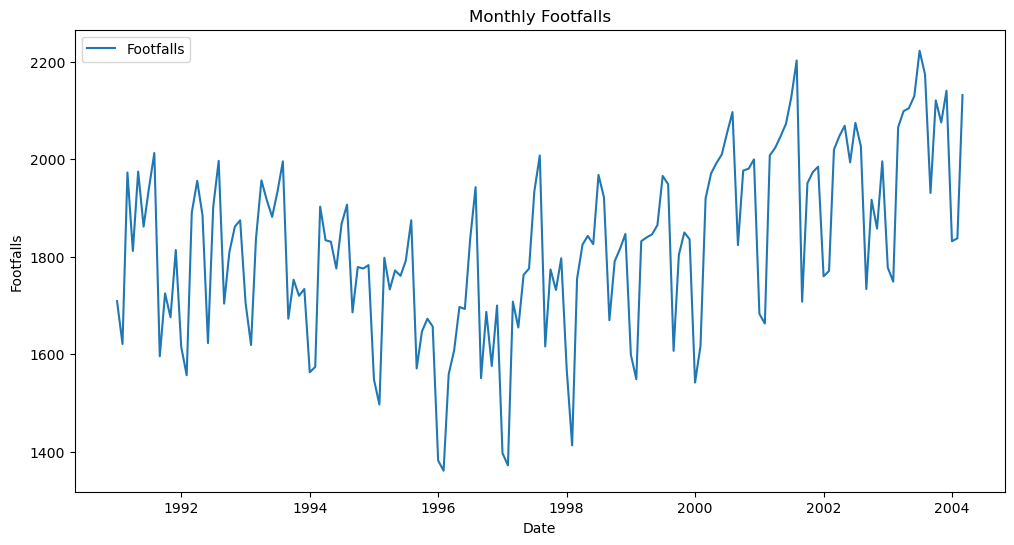

In [4]:
# Convert Month to datetime and set it as index
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.set_index('Month', inplace=True)
footfalls = data['Footfalls']

# Step 1: Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(footfalls, label='Footfalls')
plt.title('Monthly Footfalls')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.legend()
plt.show()


In [5]:

# Step 2: Check for stationarity using the Dickey-Fuller test
result = adfuller(footfalls)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.23499112877866873
p-value: 0.9342202042969284
Critical Values: {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}


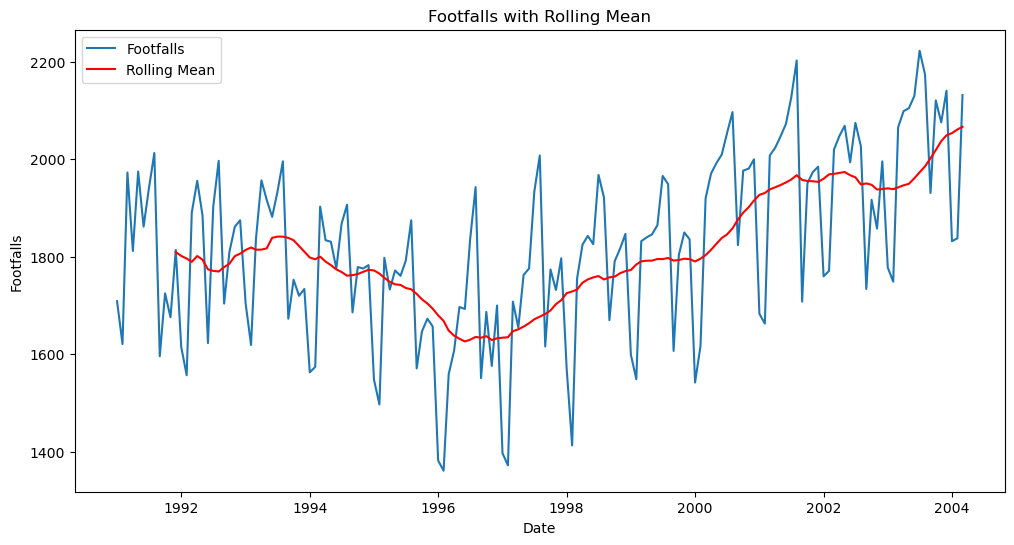

In [6]:
# Step 3: Plot the rolling mean
rolling_mean = footfalls.rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(footfalls, label='Footfalls')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.title('Footfalls with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.legend()
plt.show()

In [8]:
# Differencing the data to make it stationary
footfalls_diff = footfalls.diff().dropna()

# Perform Dickey-Fuller test on differenced data
result_diff = adfuller(footfalls_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -3.326842715430079
p-value (Differenced): 0.01372041990983376
Critical Values (Differenced): {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}


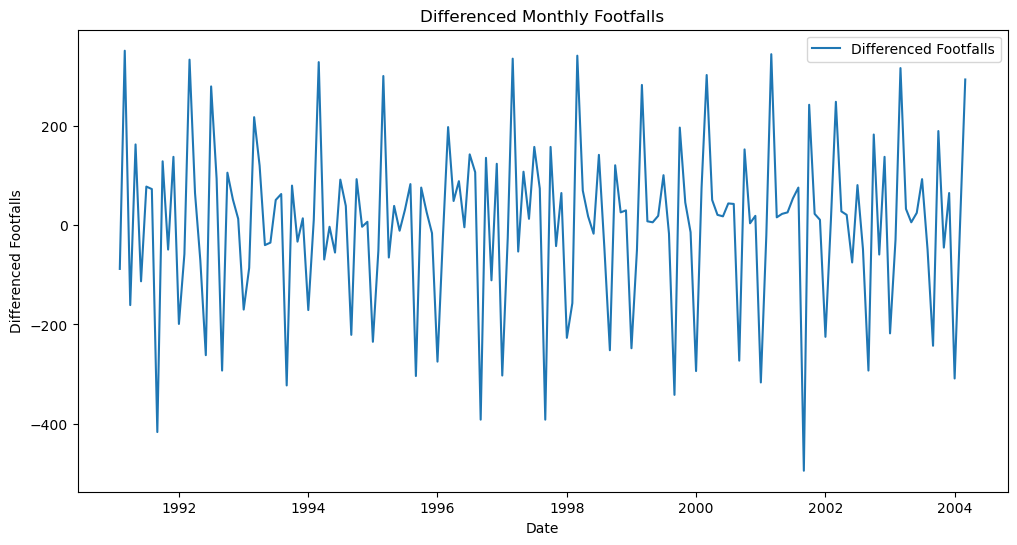

In [9]:
# Plot the differenced footfalls data
plt.figure(figsize=(12, 6))
plt.plot(footfalls_diff, label='Differenced Footfalls')
plt.title('Differenced Monthly Footfalls')
plt.xlabel('Date')
plt.ylabel('Differenced Footfalls')
plt.legend()
plt.show()

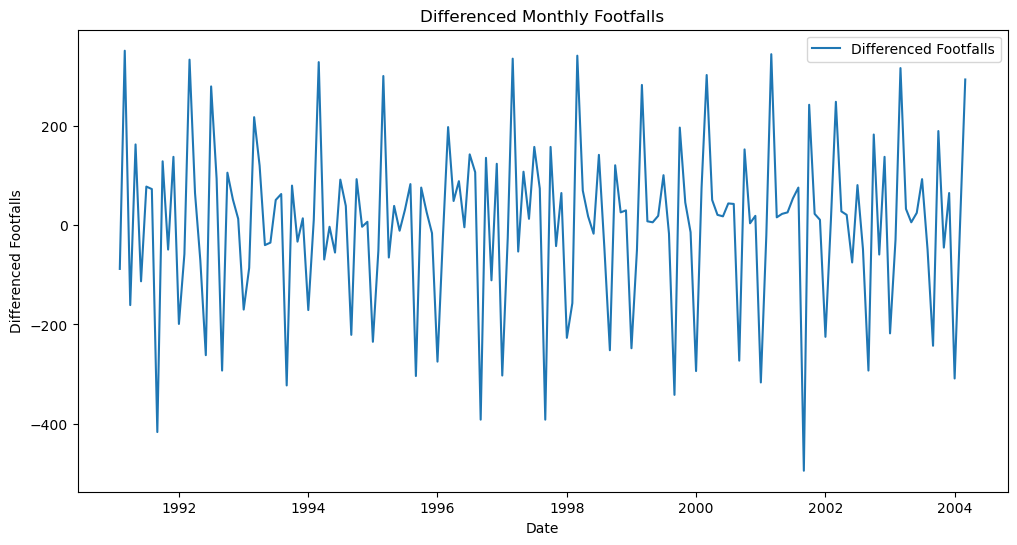

In [10]:
# Plot the differenced footfalls data
plt.figure(figsize=(12, 6))
plt.plot(footfalls_diff, label='Differenced Footfalls')
plt.title('Differenced Monthly Footfalls')
plt.xlabel('Date')
plt.ylabel('Differenced Footfalls')
plt.legend()
plt.show()

In [12]:
# Step 4: Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(footfalls) * 0.7)
train, test = footfalls[:train_size], footfalls[train_size:]



In [13]:
# Step 5: Fit ARIMA model on training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\nivet\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nivet\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nivet\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nivet\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [14]:
# Step 6: Make predictions on the test data
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

C:\Users\nivet\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [17]:
# Calculate mean squared error
mse = mean_squared_error(test, predictions)
print('Test Mean Squared Error:', mse)

# Step 7: Forecast the next 10 footfall values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)



Test Mean Squared Error: 65947.67594473554


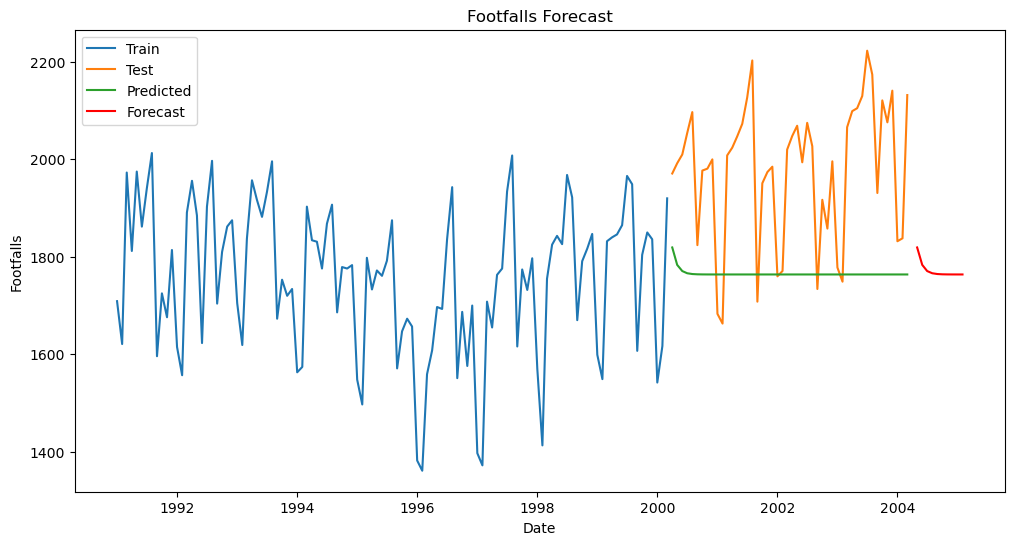

In [16]:
# Step 8: Plot the actual data, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.plot(pd.date_range(test.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Footfalls Forecast')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.legend()
plt.show()

In [ ]:
Conclusion:Here's a summary of the steps and their conclusions:

1. **Visualize the Data**: 
   - We plotted the footfalls data to understand its trend over time.

2. **Check for Stationarity using Dickey-Fuller Test**: 
   - The initial test indicated that the data is non-stationary (p-value > 0.05).

3. **Plot the Rolling Mean**:
   - The rolling mean plot confirmed an upward trend, indicating non-stationarity.

4. **Transform Data to Stationary**:
   - We differenced the data to remove the trend, making it stationary.
   - The Dickey-Fuller test on the differenced data showed that it is now stationary (p-value < 0.05).

5. **Split Data into Training and Testing Sets**:
   - The data was split with 70% for training and 30% for testing.

6. **Fit ARIMA Model**:
   - An ARIMA model was fitted to the training data.

7. **Evaluate Model on Test Set**:
   - The model's predictions on the test set were compared with actual values, yielding a mean squared error (MSE) as a measure of accuracy.

8. **Forecast the Next 10 Footfall Values**:
   - The model was used to forecast the next 10 footfall values.
   - A plot was created showing the actual data, test predictions, and future forecasts.

### Conclusion:
- The data initially showed a non-stationary trend, but differencing made it stationary.
- The ARIMA model provided a reasonable fit and forecast for the footfalls data.
- The model's predictions and future forecasts were visualized, showing the model's potential for practical forecasting applications.